## Importando bibliotecas

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import sys
from util import *
import gc
import pickle

import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

C:\Users\Jean\Documents\projetos\telco_churn\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Lendo os dados

In [13]:
df = pd.read_excel("../data/raw/telco_churn.xlsx")
df = df.drop(columns=['customerID'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


## Entendimento dos dados e do target

In [9]:
df.shape

(7043, 20)

In [14]:
metadados = generate_metadata(df=df, targets=['Churn'], orderby='CARDINALIDADE')
metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,TotalCharges,Explicativa,11,0.16,6530,float64
1,MonthlyCharges,Explicativa,0,0.00,1585,float64
2,tenure,Explicativa,0,0.00,73,int64
3,PaymentMethod,Explicativa,0,0.00,4,object
4,StreamingMovies,Explicativa,0,0.00,3,object
5,TechSupport,Explicativa,0,0.00,3,object
6,OnlineBackup,Explicativa,0,0.00,3,object
7,StreamingTV,Explicativa,0,0.00,3,object
8,DeviceProtection,Explicativa,0,0.00,3,object
9,MultipleLines,Explicativa,0,0.00,3,object


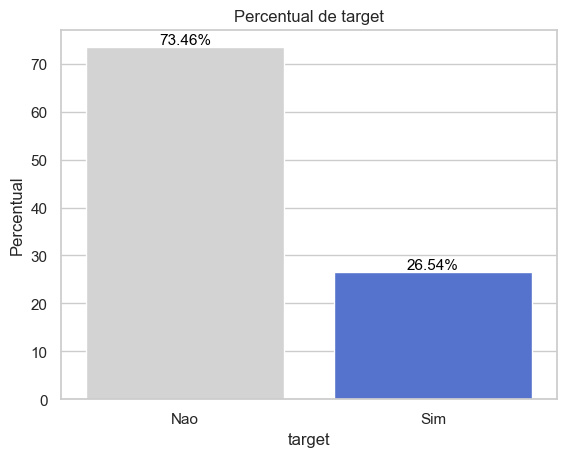

In [11]:
### Entendimento da variável resposta
target_counts = df['Churn'].value_counts()

# Calculando percentuais de churn
percent_n = (target_counts[0] / len(df)) * 100
percent_s = (target_counts[1] / len(df)) * 100

# Criando dataframe
total_por_target = pd.DataFrame({'target': ['Nao', 'Sim'], 'Percentual': [percent_n, percent_s]})

#Definição de cores
cores = {'Nao': 'lightgrey', 'Sim': 'royalblue'}

# Plot do gráfico
ax = sns.barplot(x='target', y='Percentual', hue='target', data=total_por_target, palette=cores, dodge=False)

# Adicionando valores de cada barra
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('target')
plt.ylabel('Percentual')
plt.title('Percentual de target')
plt.show()

## Análises univariadas e bivariadas

🔹 Análise Univariada - Variáveis Categóricas


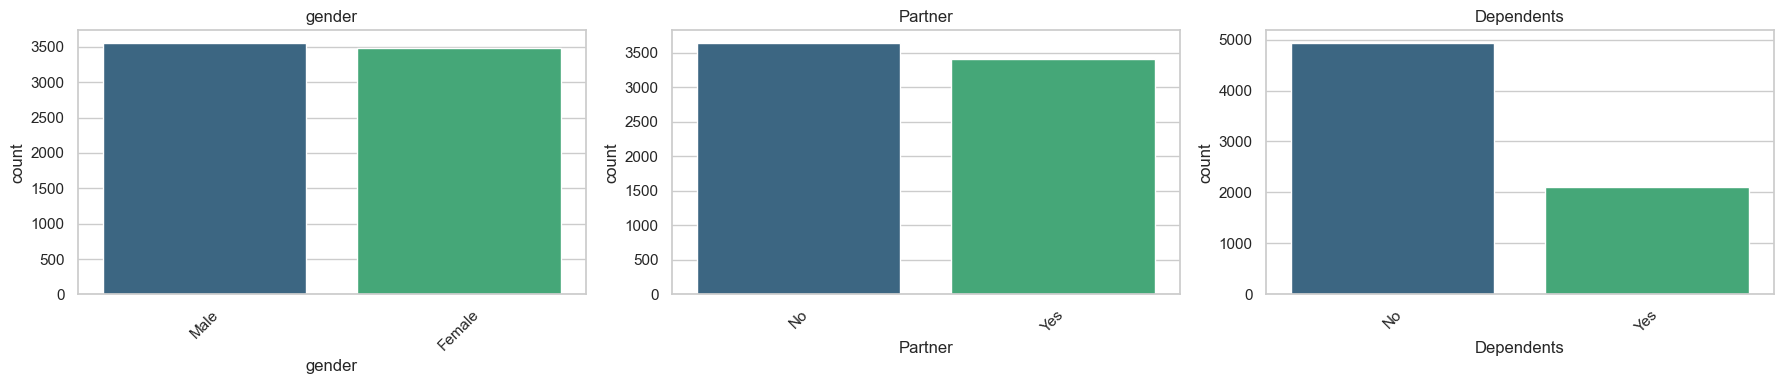

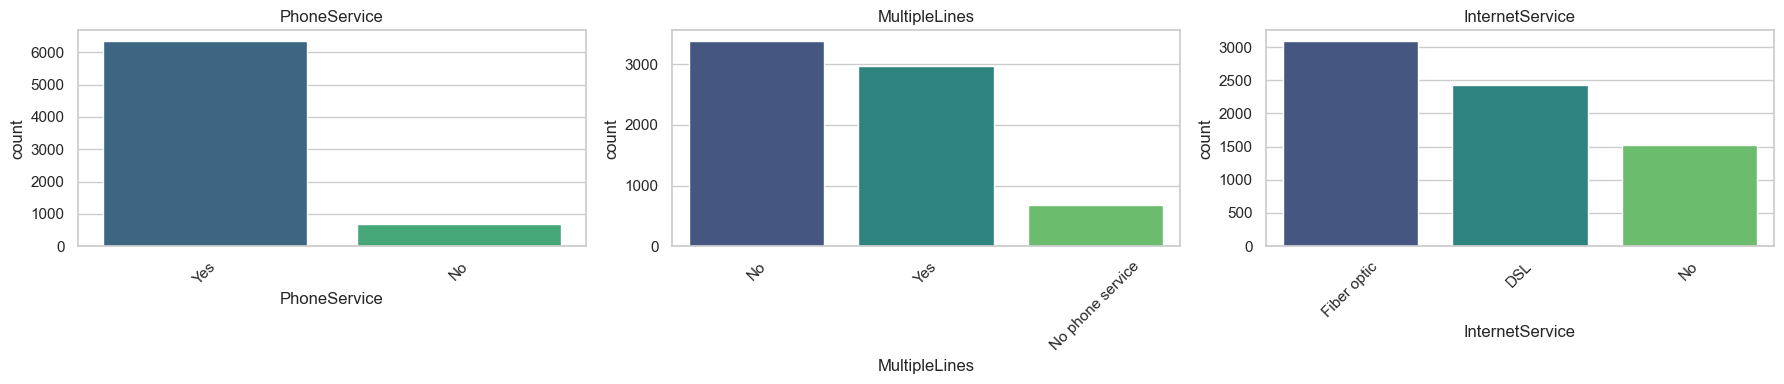

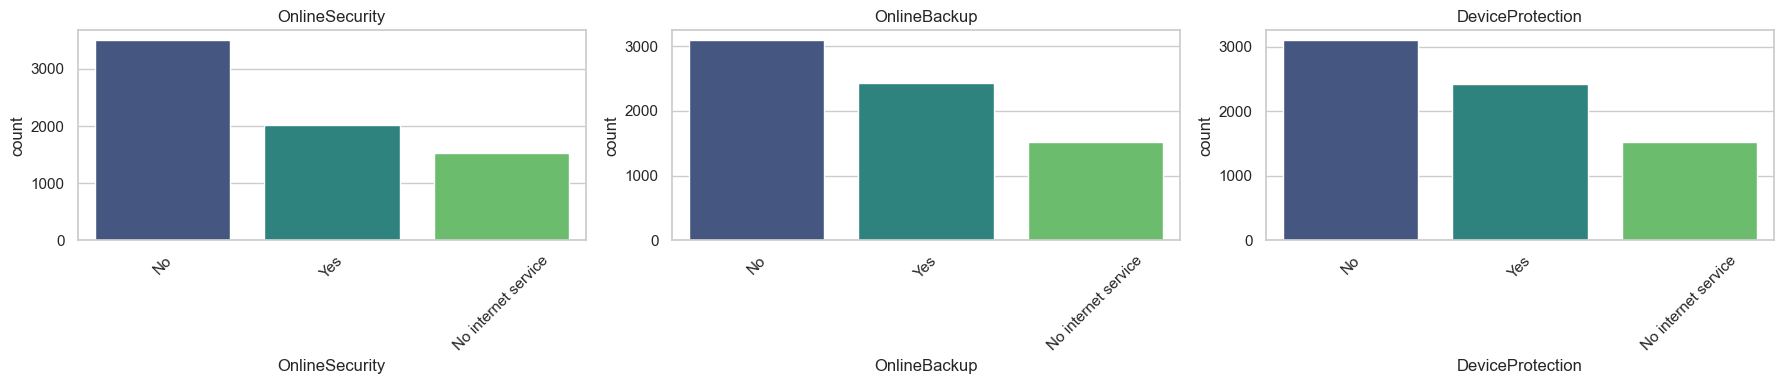

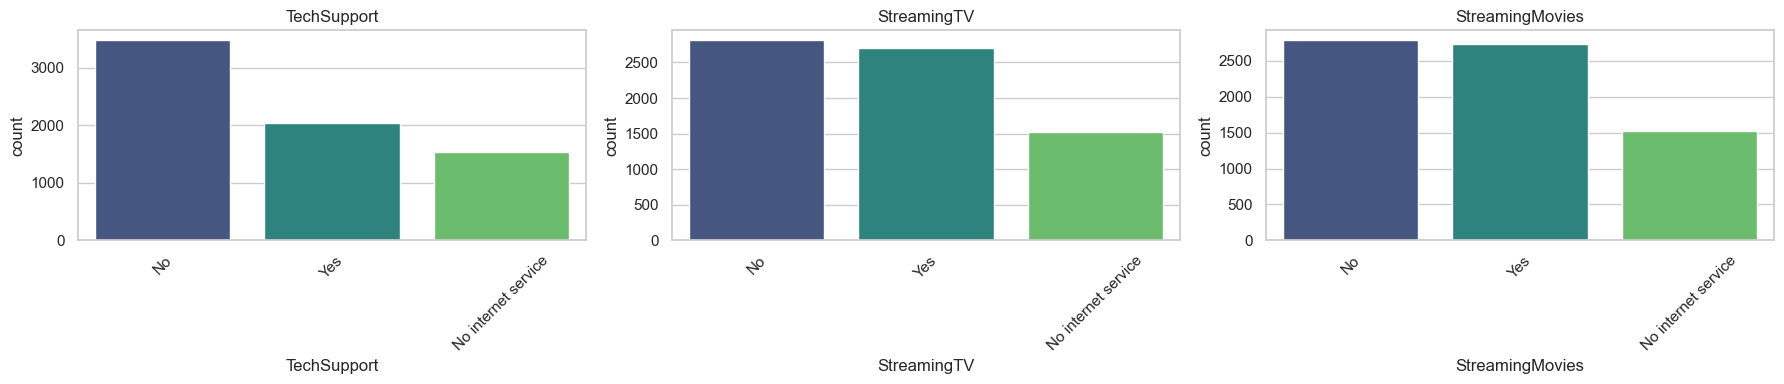

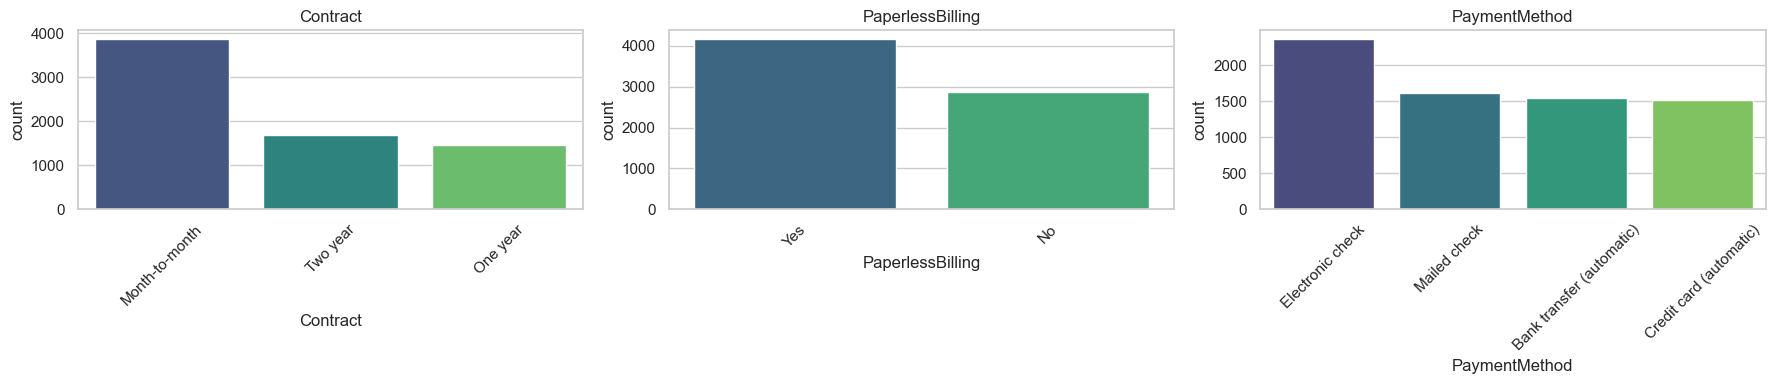

🔹 Análise Univariada - Variáveis Numéricas


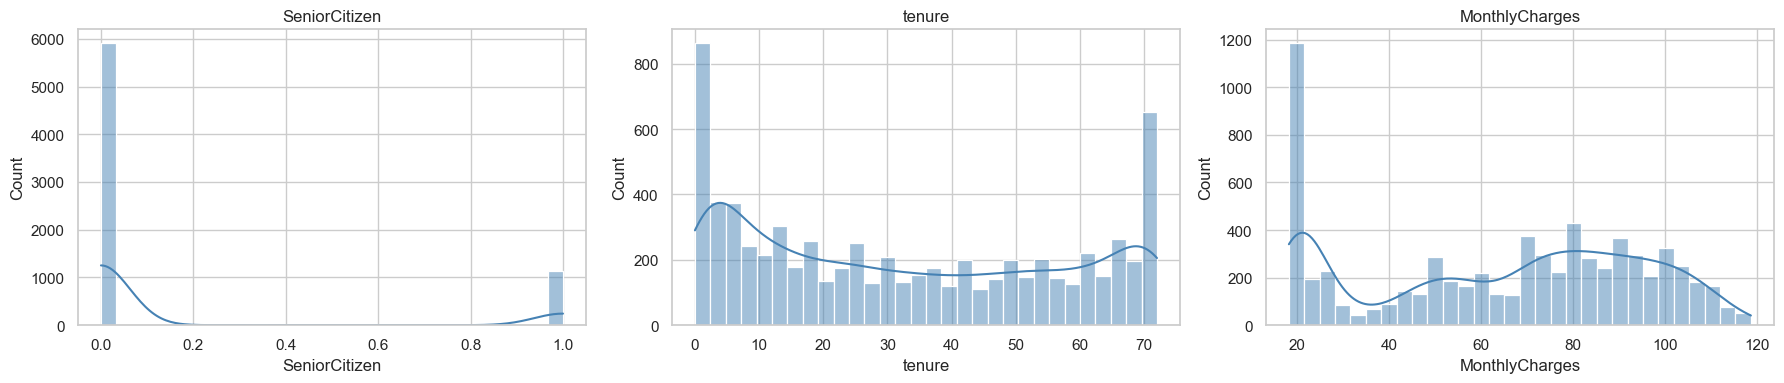

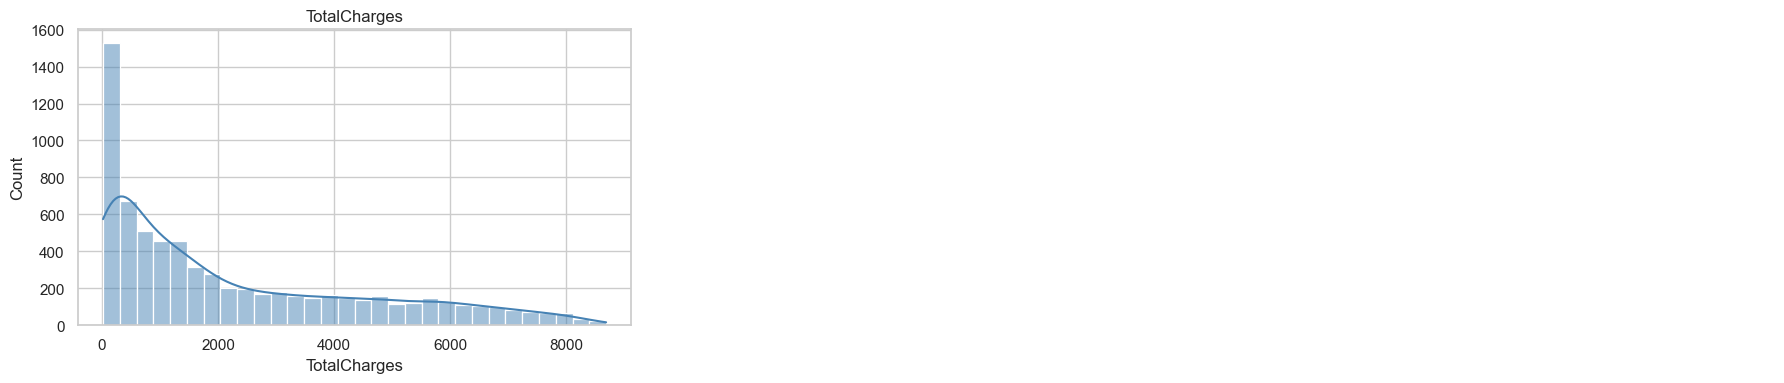

🔹 Análise Bivariada - Variáveis Categóricas vs Alvo


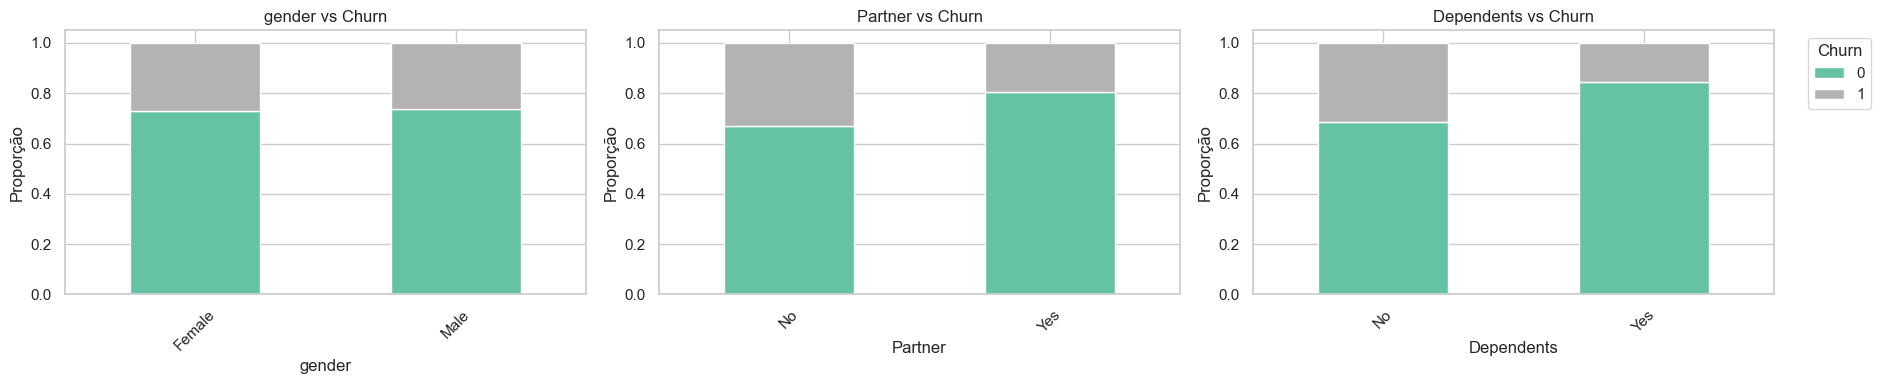

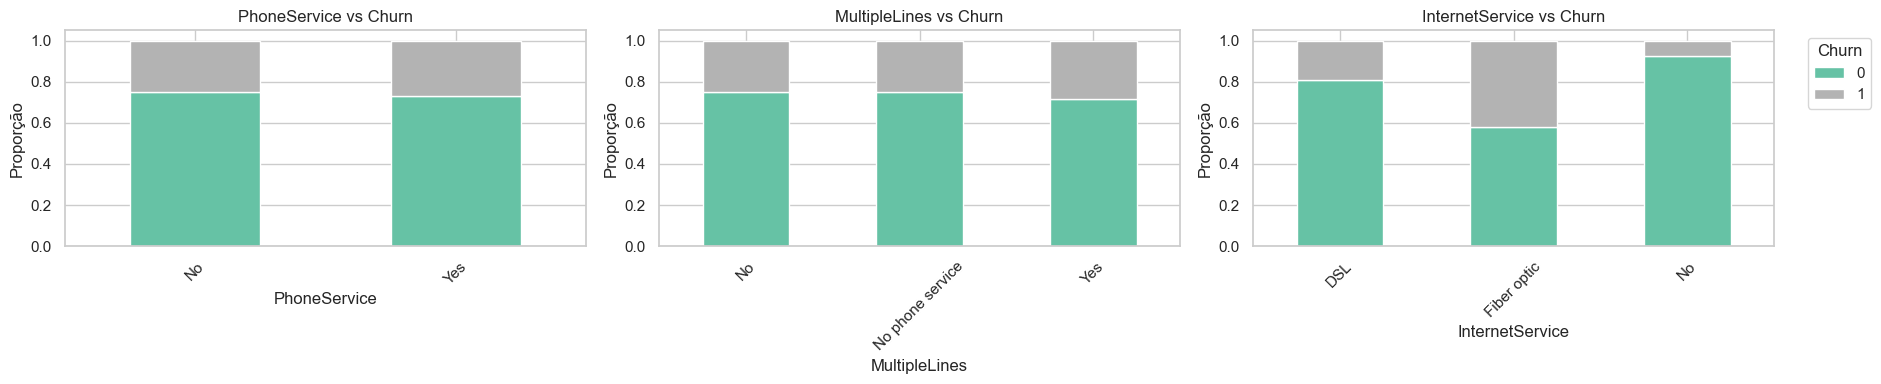

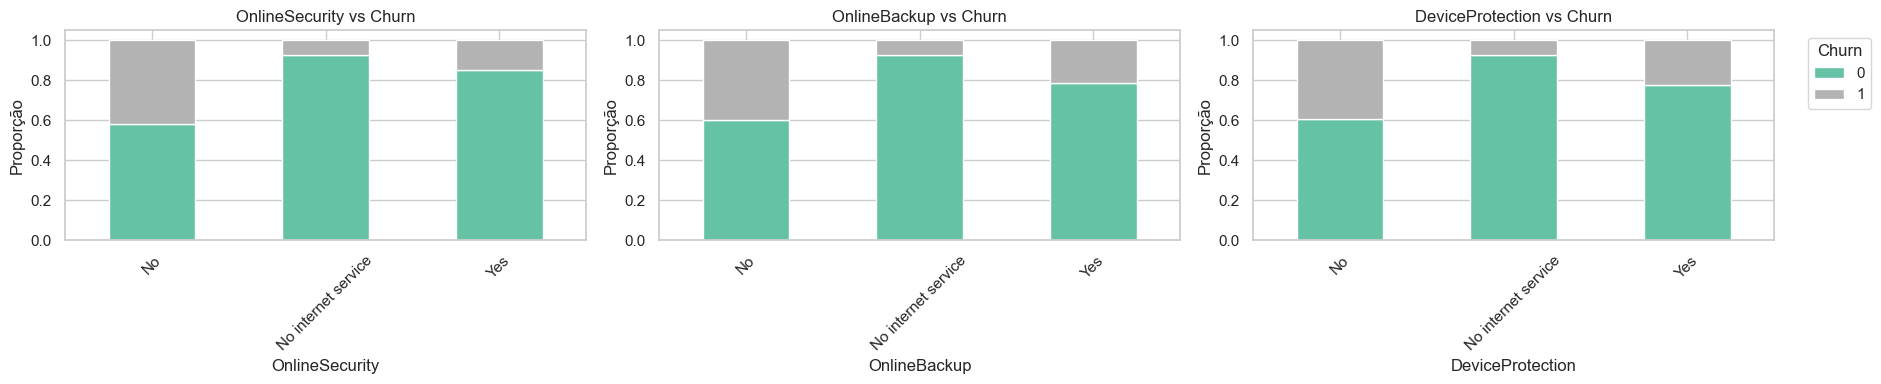

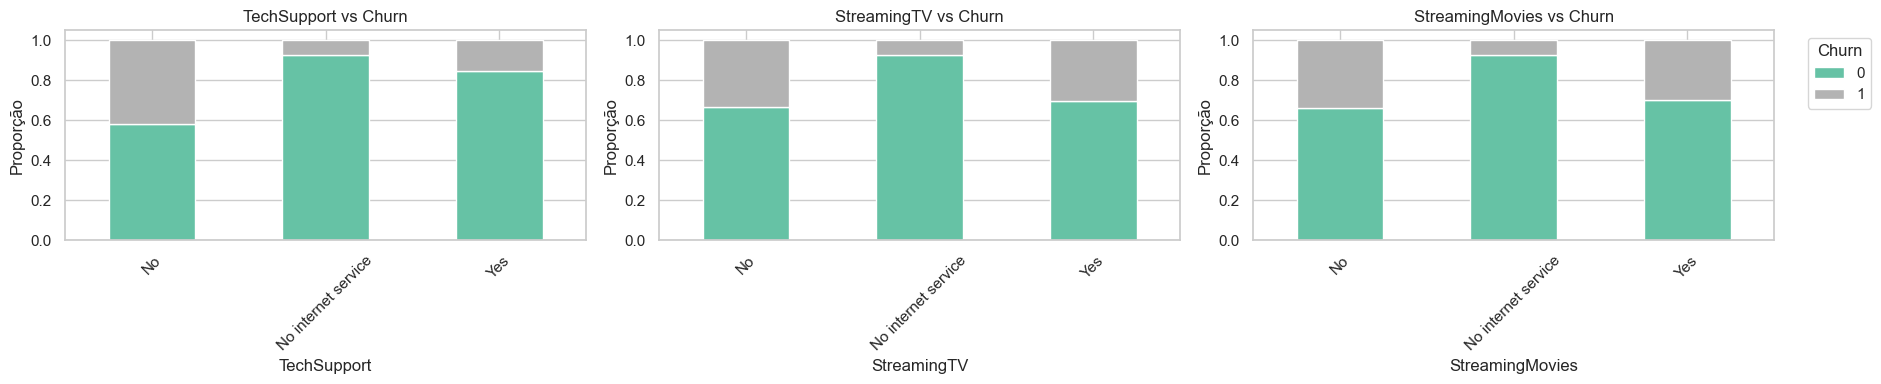

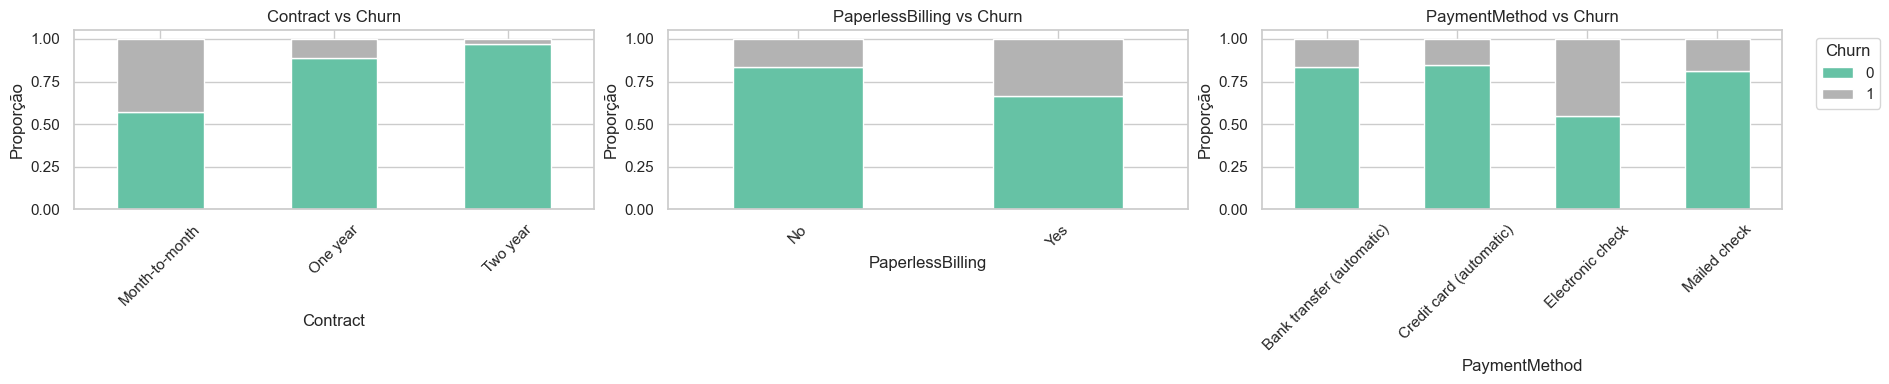

🔹 Análise Bivariada - Variáveis Numéricas vs Alvo


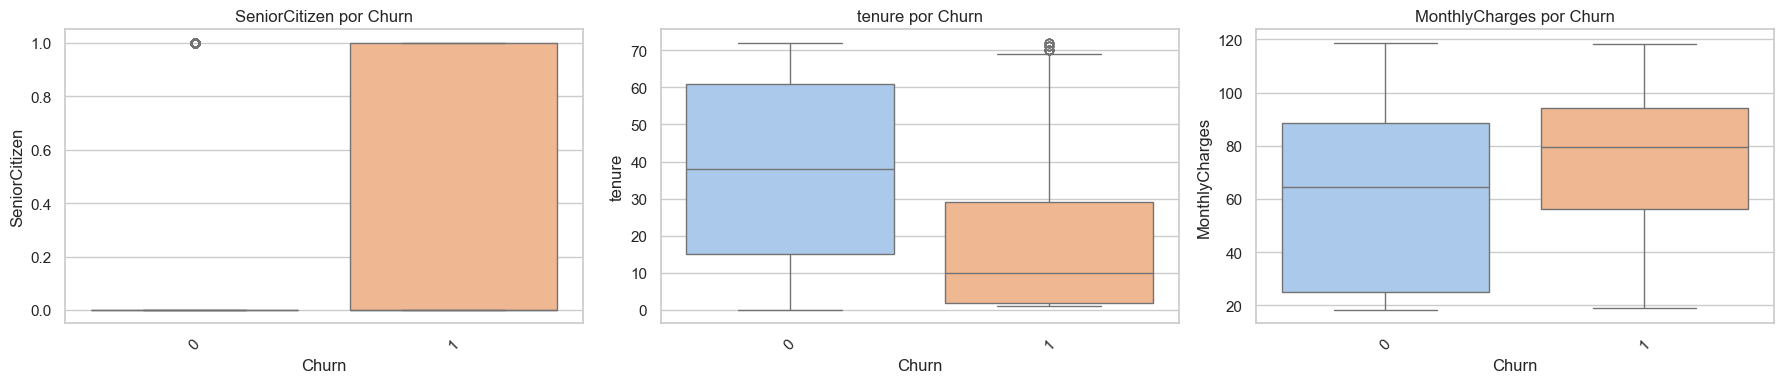

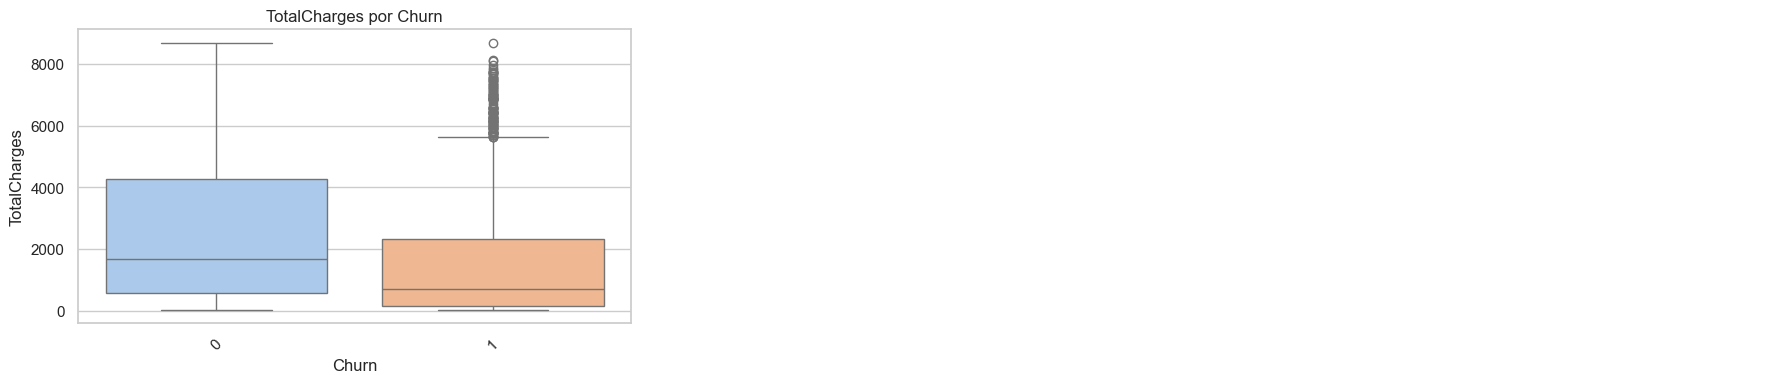

In [15]:
import math
# Variáveis de interesse
target = 'Churn'

categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Remove o target da lista de variáveis categóricas
if target in numerical_vars:
    numerical_vars.remove(target)

# --------------------
# Execução das análises
# --------------------

print("🔹 Análise Univariada - Variáveis Categóricas")
univariate_categorical(df, categorical_vars)

print("🔹 Análise Univariada - Variáveis Numéricas")
univariate_numerical(df, numerical_vars)

print("🔹 Análise Bivariada - Variáveis Categóricas vs Alvo")
bivariate_categorical_target(df, categorical_vars, target)

print("🔹 Análise Bivariada - Variáveis Numéricas vs Alvo")
bivariate_numerical_target(df, numerical_vars, target)



In [16]:
df_iv = analise_iv(df, 'Churn')
df_iv.get_lista_iv()

Churn,IV
Variavel,
Contract,1.24
tenure,0.81
OnlineSecurity,0.72
TechSupport,0.70
InternetService,0.62
OnlineBackup,0.52
DeviceProtection,0.50
PaymentMethod,0.46
StreamingMovies,0.38


In [17]:
df_iv.get_bivariada(var_escolhida='Contract')

==> "Contract" tem IV de 1.24


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Contract,Month-to-month,1655,2220,3875,55.02,88.55,42.91,42.71,2.06,0.72,0.33
1,Contract,One year,166,1307,1473,20.91,8.88,25.26,11.27,0.35,-1.05,0.17
2,Contract,Two year,48,1647,1695,24.07,2.57,31.83,2.83,0.08,-2.53,0.74


In [18]:
df_iv.get_bivariada(var_escolhida='tenure')

==> "tenure" tem IV de 0.81


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,tenure,"(-0.01, 2.0]",503,359,862,12.24,26.91,6.94,58.35,3.88,1.36,0.27
1,tenure,"(2.0, 6.0]",281,338,619,8.79,15.03,6.53,45.40,2.30,0.83,0.07
2,tenure,"(6.0, 12.0]",253,452,705,10.01,13.54,8.74,35.89,1.55,0.44,0.02
3,tenure,"(12.0, 20.0]",214,478,692,9.83,11.45,9.24,30.92,1.24,0.22,0.00
4,tenure,"(20.0, 29.0]",158,533,691,9.81,8.45,10.30,22.87,0.82,-0.20,0.00
5,tenure,"(29.0, 40.0]",157,560,717,10.18,8.40,10.82,21.90,0.78,-0.25,0.01
6,tenure,"(40.0, 50.0]",115,537,652,9.26,6.15,10.38,17.64,0.59,-0.53,0.02
7,tenure,"(50.0, 60.0]",95,603,698,9.91,5.08,11.65,13.61,0.44,-0.82,0.05
8,tenure,"(60.0, 69.0]",70,686,756,10.73,3.75,13.26,9.26,0.28,-1.27,0.12
9,tenure,"(69.0, 72.0]",23,628,651,9.24,1.23,12.14,3.53,0.10,-2.30,0.25


In [19]:
df_iv.get_bivariada(var_escolhida='OnlineSecurity')

==> "OnlineSecurity" tem IV de 0.72


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,OnlineSecurity,No,1461,2037,3498,49.67,78.17,39.37,41.77,1.99,0.69,0.27
1,OnlineSecurity,No internet service,113,1413,1526,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,OnlineSecurity,Yes,295,1724,2019,28.67,15.78,33.32,14.61,0.47,-0.76,0.13


In [20]:
df_iv.get_bivariada(var_escolhida='TechSupport')

==> "TechSupport" tem IV de 0.7


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,TechSupport,No,1446,2027,3473,49.31,77.37,39.18,41.64,1.97,0.68,0.26
1,TechSupport,No internet service,113,1413,1526,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,TechSupport,Yes,310,1734,2044,29.02,16.59,33.51,15.17,0.50,-0.69,0.12


In [25]:
df_iv.get_bivariada(var_escolhida='PaymentMethod')

==> "PaymentMethod" tem IV de 0.46


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,PaymentMethod,Bank transfer (automatic),258,1286,1544,21.92,13.80,24.86,16.71,0.56,-0.58,0.06
1,PaymentMethod,Credit card (automatic),232,1290,1522,21.61,12.41,24.93,15.24,0.50,-0.69,0.09
2,PaymentMethod,Electronic check,1071,1294,2365,33.58,57.30,25.01,45.29,2.29,0.83,0.27
3,PaymentMethod,Mailed check,308,1304,1612,22.89,16.48,25.20,19.11,0.65,-0.43,0.04


In [21]:
df_iv.get_bivariada(var_escolhida='InternetService')

==> "InternetService" tem IV de 0.62


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,InternetService,DSL,459,1962,2421,34.37,24.56,37.92,18.96,0.65,-0.43,0.06
1,InternetService,Fiber optic,1297,1799,3096,43.96,69.40,34.77,41.89,2.00,0.69,0.24
2,InternetService,No,113,1413,1526,21.67,6.05,27.31,7.40,0.22,-1.51,0.32


In [23]:
df_iv.get_bivariada(var_escolhida='TotalCharges')

==> "TotalCharges" tem IV de 0.34


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,TotalCharges,"(18.79, 84.6]",369,336,705,10.03,19.74,6.51,52.34,3.03,1.11,0.15
1,TotalCharges,"(84.6, 267.07]",278,424,702,9.98,14.87,8.21,39.60,1.81,0.59,0.04
2,TotalCharges,"(267.07, 552.0]",215,488,703,10.00,11.50,9.45,30.58,1.22,0.20,0.00
3,TotalCharges,"(552.0, 944.17]",192,511,703,10.00,10.27,9.90,27.31,1.04,0.04,0.00
4,TotalCharges,"(944.17, 1397.48]",155,548,703,10.00,8.29,10.61,22.05,0.78,-0.25,0.01
5,TotalCharges,"(1397.48, 2048.95]",137,566,703,10.00,7.33,10.96,19.49,0.67,-0.40,0.01
6,TotalCharges,"(2048.95, 3141.13]",198,505,703,10.00,10.59,9.78,28.17,1.08,0.08,0.00
7,TotalCharges,"(3141.13, 4475.41]",126,577,703,10.00,6.74,11.18,17.92,0.60,-0.51,0.02
8,TotalCharges,"(4475.41, 5976.64]",111,592,703,10.00,5.94,11.47,15.79,0.52,-0.65,0.04
9,TotalCharges,"(5976.64, 8684.8]",88,616,704,10.01,4.71,11.93,12.50,0.39,-0.94,0.07


## Salvando novo dataframe para modelagem

In [24]:
df.to_parquet('../data/processed/df.parquet')